In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/temp_all_80_19.csv')

In [3]:
df.head(2)

,DateTime,Temp
0,1980-01-01,33.3999
1,1980-01-02,31.6287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14324 entries, 0 to 14323
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  14324 non-null  object 
 1   Temp      14324 non-null  float64
dtypes: float64(1), object(1)
memory usage: 223.9+ KB


In [5]:
def df_cleaner(df):
    #df['DateTime'] = df['DateTime'].map(lambda x:x[:-6])
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df

In [6]:
df_temp = df_cleaner(df)

In [7]:
df_temp.head()

,DateTime,Temp
0,1980-01-01,33.3999
1,1980-01-02,31.6287
2,1980-01-03,28.9974
3,1980-01-04,28.7272
4,1980-01-05,28.8493


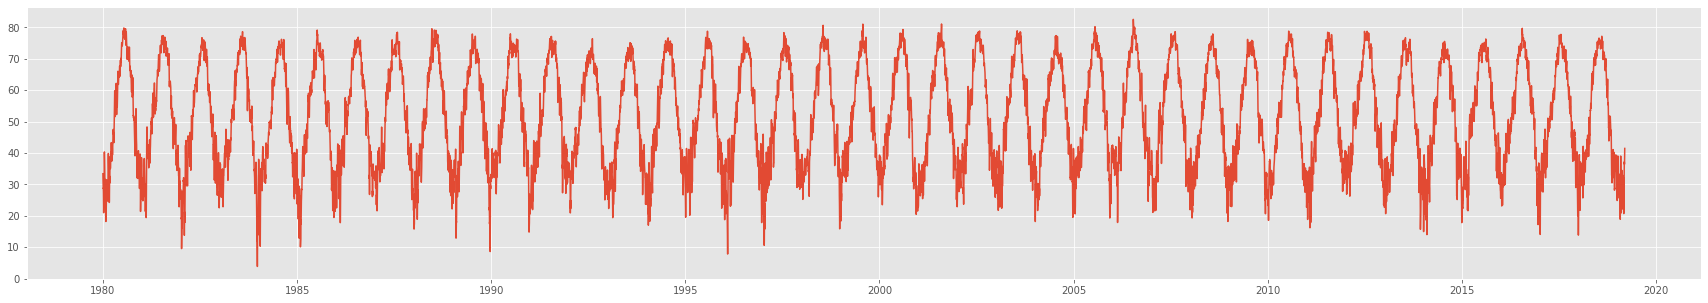

In [8]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_temp['DateTime'], df_temp['Temp'])

In [9]:
import datetime as dt
include = df[df['DateTime'].dt.year == 2008]
#exclude = df[df['Date'].dt.year != year]

In [10]:
df2 = pd.read_excel('data/reserves/NG_wet_nonasso_asso_dry_sum.xls', header= 2)

In [11]:
df2.tail()

,Date,"U.S. Natural Gas, Wet After Lease Separation Proved Reserves (Billion Cubic Feet)","U.S. Nonassociated Natural Gas, Wet After Lease Separation, Proved Reserves (Billion Cubic Feet)","U.S. Associated-Dissolved Natural Gas, Wet After Lease Separation, Proved Reserves (Billion Cubic Feet)",U.S. Dry Natural Gas Expected Future Production (Billion Cubic Feet),"U.S. Natural Gas Plant Liquids, Proved Reserves (Million Barrels)"
78,2013-06-30,353994.0,295504.0,58490.0,338264,NaN
79,2014-06-30,388841.0,319724.0,69117.0,368704,NaN
80,2015-06-30,324303.0,258807.0,65496.0,307730,NaN
81,2016-06-30,341133.0,268913.0,72220.0,322234,NaN
82,2017-06-30,464292.0,364846.0,99446.0,438460,NaN


In [12]:
df_rev = df2[['Date', 'U.S. Natural Gas, Wet After Lease Separation Proved Reserves (Billion Cubic Feet)']]
df_rev.rename(index=str, columns={"Date": "DateTime", 'U.S. Natural Gas, Wet After Lease Separation Proved Reserves (Billion Cubic Feet)': "Reserves BCFE"}, inplace = True)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_rev.tail()

,DateTime,Reserves BCFE
78,2013-06-30,353994.0
79,2014-06-30,388841.0
80,2015-06-30,324303.0
81,2016-06-30,341133.0
82,2017-06-30,464292.0


In [14]:
df3 = pd.read_csv('data/weekly_Underground_Storage.csv')
df3 .rename(index=str, columns={"Week of": "DateTime", 'Lower 48 States Natural Gas Working Underground Storage Billion Cubic Feet': "Storage BCFE"}, inplace = True)
df_stor = df_cleaner(df3)

In [15]:
df_stor.head()

,DateTime,Storage BCFE
0,2019-03-22,1107
1,2019-03-15,1143
2,2019-03-08,1190
3,2019-03-01,1390
4,2019-02-22,1539


In [16]:
df4 = pd.read_csv('data/monthly_production.csv')

In [17]:
df4.rename(index=str, columns={"Month": "DateTime", "U.S. Natural Gas Gross Withdrawals  Million Cubic Feet": "Production MMCF"}, inplace = True)

In [18]:
df_prod = df_cleaner(df4)

In [19]:
df_prod.head()

,DateTime,Production MMCF
0,2019-01-01,3352124
1,2018-12-01,3351564
2,2018-11-01,3233430
3,2018-10-01,3272022
4,2018-09-01,3134786


In [20]:
df5 = pd.read_csv('data/Henry_Hub_Natural_Gas_Spot_Price.csv')

In [21]:
df5.rename(index=str, columns={"Day": "DateTime", 'Henry Hub Natural Gas Spot Price Dollars per Million Btu': 'Henry Hub Price $/MMBtu'}, inplace = True)

In [22]:
df_price = df_cleaner(df5)

In [23]:
df6 = pd.read_csv('data/Consumption.csv')
df6.rename(index=str, columns={"Month": "DateTime", 'U.S. Natural Gas Total Consumption  Million Cubic Feet': 'Consumption MMCF'}, inplace = True)

In [24]:
df_cons = df_cleaner(df6)

In [25]:
df_cons.head(5)

,DateTime,Consumption MMCF
0,2019-01-01,3386730
1,2018-12-01,2969569
2,2018-11-01,2688953
3,2018-10-01,2276313
4,2018-09-01,2158676


In [26]:
df_temp.tail(10)

,DateTime,Temp
14314,2019-03-04,20.6935
14315,2019-03-05,23.3083
14316,2019-03-06,27.2867
14317,2019-03-07,31.3371
14318,2019-03-08,35.1228
14319,2019-03-09,37.1899
14320,2019-03-10,36.4206
14321,2019-03-11,36.5454
14322,2019-03-12,39.8039
14323,2019-03-13,41.4588


In [27]:
df_prod.head(1)

,DateTime,Production MMCF
0,2019-01-01,3352124


In [28]:
df_stor.head(5)

,DateTime,Storage BCFE
0,2019-03-22,1107
1,2019-03-15,1143
2,2019-03-08,1190
3,2019-03-01,1390
4,2019-02-22,1539


In [29]:
df_rev.head(1)

,DateTime,Reserves BCFE
0,1925-06-30,NaN


In [30]:
df_test = df_price
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5577 entries, 0 to 5576
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 5577 non-null   datetime64[ns]
 1   Henry Hub Price $/MMBtu  5576 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 130.7+ KB


In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14324 entries, 0 to 14323
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  14324 non-null  datetime64[ns]
 1   Temp      14324 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 223.9 KB


In [32]:
#pd.set_option('display.max_rows', 500)
df_pi_tem = df_test.join(df_temp.set_index('DateTime'), on='DateTime')

In [33]:
df_pi_tem_pro = df_pi_tem.join(df_prod.set_index('DateTime'), on='DateTime')

In [34]:
df_pi_tem_pro_stor = df_pi_tem_pro.join(df_stor.set_index('DateTime'), on='DateTime')

In [35]:
df_pi_tem_pro_stor.join(df_rev.set_index('DateTime'), on='DateTime')

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE
0,2019-03-11,2.86,36.5454,NaN,NaN,NaN
1,2019-03-08,2.90,35.1228,NaN,1190.0,NaN
2,2019-03-07,2.90,31.3371,NaN,NaN,NaN
3,2019-03-06,3.18,27.2867,NaN,NaN,NaN
4,2019-03-05,3.18,23.3083,NaN,NaN,NaN
...,...,...,...,...,...,...
5572,1997-01-13,4.00,12.0574,NaN,NaN,NaN
5573,1997-01-10,3.92,21.5541,NaN,NaN,NaN
5574,1997-01-09,3.61,27.1393,NaN,NaN,NaN
5575,1997-01-08,3.80,27.2858,NaN,NaN,NaN


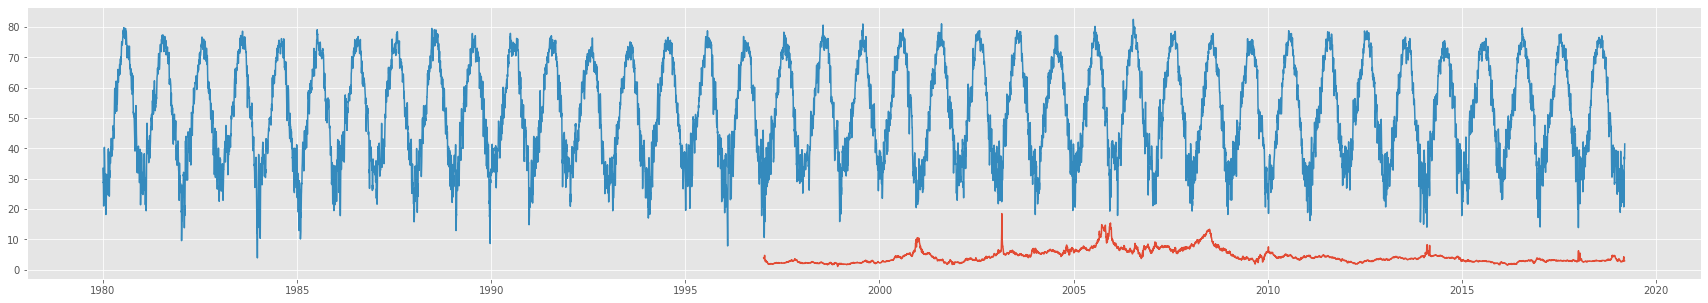

In [36]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_price['DateTime'], df_price['Henry Hub Price $/MMBtu'])
ax.plot(df_temp['DateTime'], df_temp['Temp'])




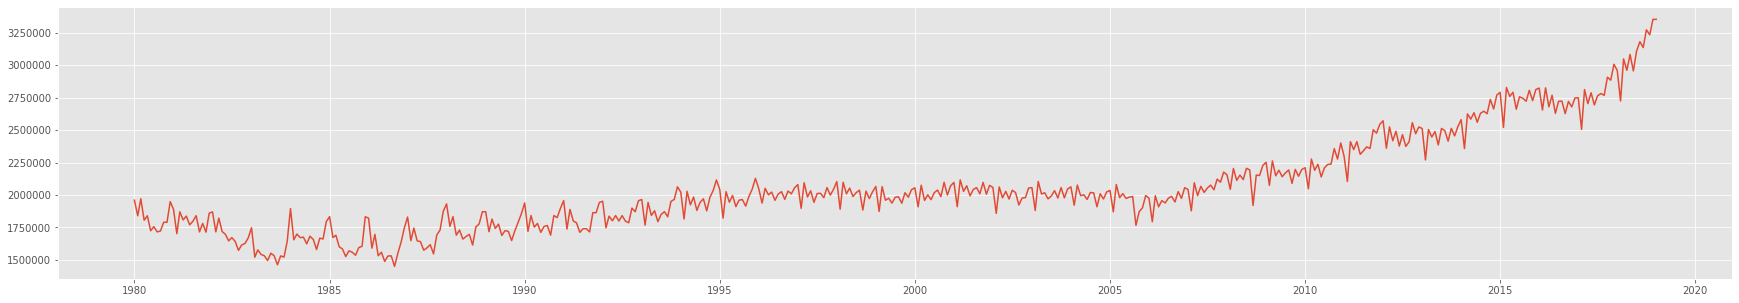

In [37]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_prod['DateTime'], df_prod['Production MMCF'])


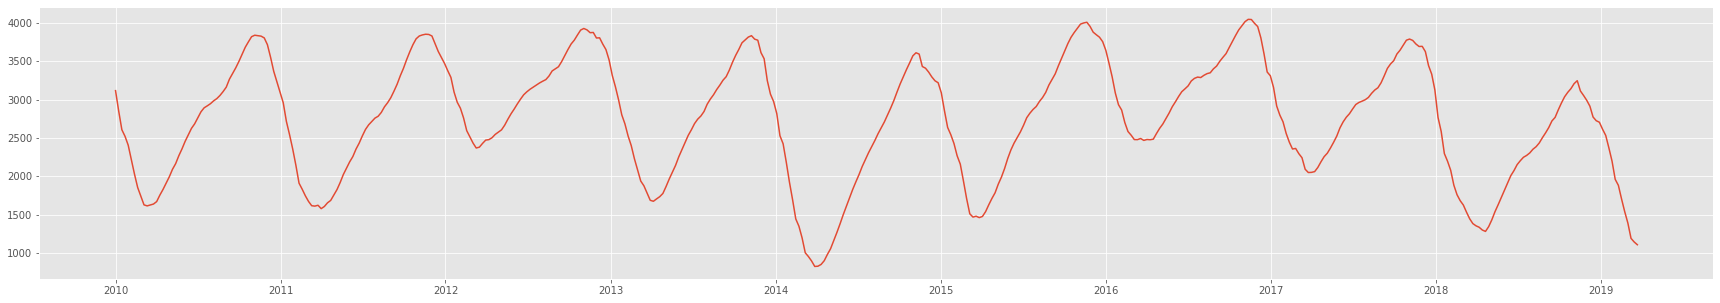

In [38]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_stor['DateTime'], df_stor['Storage BCFE'])

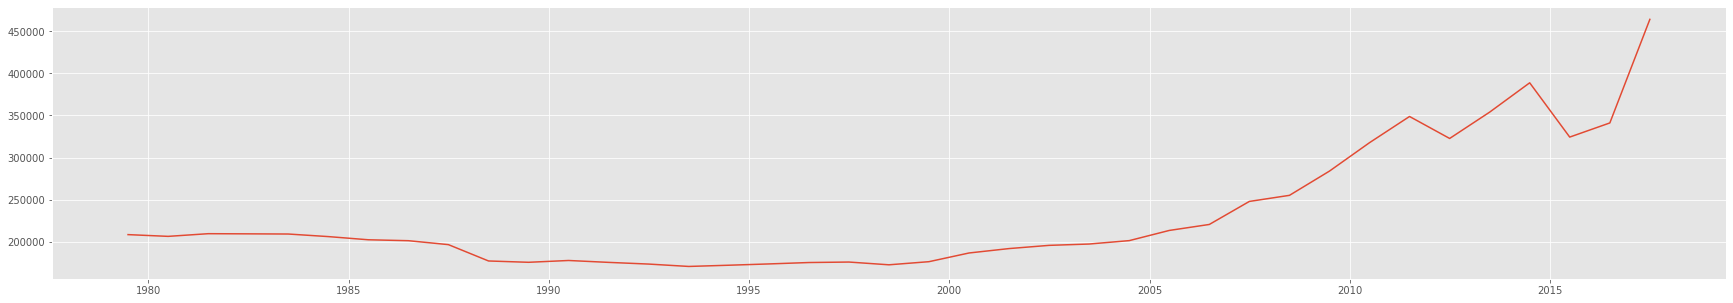

In [39]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_rev['DateTime'], df_rev['Reserves BCFE'])

In [40]:
year = '2008'
end = '2019'
period = pd.Period(year, freq='Y')
end_period = pd.Period(end, freq='Y')
df_time = pd.Series(pd.date_range(start=period.start_time, end=end_period.end_time, freq='D')).to_frame('DateTime')

In [41]:
df_ti_pi= df_time.join(df_price.set_index('DateTime'), on='DateTime')
df_pi_tem = df_ti_pi.join(df_temp.set_index('DateTime'), on='DateTime')
df_pi_tem_pro = df_pi_tem.join(df_prod.set_index('DateTime'), on='DateTime')
df_pi_tem_pro_stor = df_pi_tem_pro.join(df_stor.set_index('DateTime'), on='DateTime')
df_pi_tem_pro_stor_rev = df_pi_tem_pro_stor.join(df_rev.set_index('DateTime'), on='DateTime')
df_all = df_pi_tem_pro_stor_rev.join(df_cons.set_index('DateTime'), on='DateTime')

In [42]:
df_all.iloc[728:740]

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
728,2009-12-29,6.01,25.2061,NaN,NaN,NaN,NaN
729,2009-12-30,5.78,28.3431,NaN,NaN,NaN,NaN
730,2009-12-31,5.82,28.3233,NaN,NaN,NaN,NaN
731,2010-01-01,NaN,26.0317,2210163.0,3117.0,NaN,2809788.0
731,2010-01-01,NaN,26.0317,2210163.0,3117.0,NaN,2809788.0
732,2010-01-02,NaN,24.2249,NaN,NaN,NaN,NaN
733,2010-01-03,NaN,23.5537,NaN,NaN,NaN,NaN
734,2010-01-04,6.09,23.2831,NaN,NaN,NaN,NaN
735,2010-01-05,6.19,24.5469,NaN,NaN,NaN,NaN
736,2010-01-06,6.47,25.2813,NaN,NaN,NaN,NaN


In [43]:
df_all_test = df_all

In [44]:
df_all_test2 = df_all_test[(df_all_test.DateTime > '2009-12-31') & (df_all_test.DateTime < '2019-03-12')]

In [45]:
df_almost = df_all_test.fillna(method='ffill')

In [46]:
df_fine = df_almost[(df_almost.DateTime > '2009-12-31') & (df_almost.DateTime < '2019-03-12')]

In [47]:
df_fine.head(10)

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
731,2010-01-01,5.82,26.0317,2210163.0,3117.0,283879.0,2809788.0
731,2010-01-01,5.82,26.0317,2210163.0,3117.0,283879.0,2809788.0
732,2010-01-02,5.82,24.2249,2210163.0,3117.0,283879.0,2809788.0
733,2010-01-03,5.82,23.5537,2210163.0,3117.0,283879.0,2809788.0
734,2010-01-04,6.09,23.2831,2210163.0,3117.0,283879.0,2809788.0
735,2010-01-05,6.19,24.5469,2210163.0,3117.0,283879.0,2809788.0
736,2010-01-06,6.47,25.2813,2210163.0,3117.0,283879.0,2809788.0
737,2010-01-07,7.51,21.0909,2210163.0,3117.0,283879.0,2809788.0
738,2010-01-08,6.56,18.5464,2210163.0,2850.0,283879.0,2809788.0
739,2010-01-09,6.56,21.1352,2210163.0,2850.0,283879.0,2809788.0


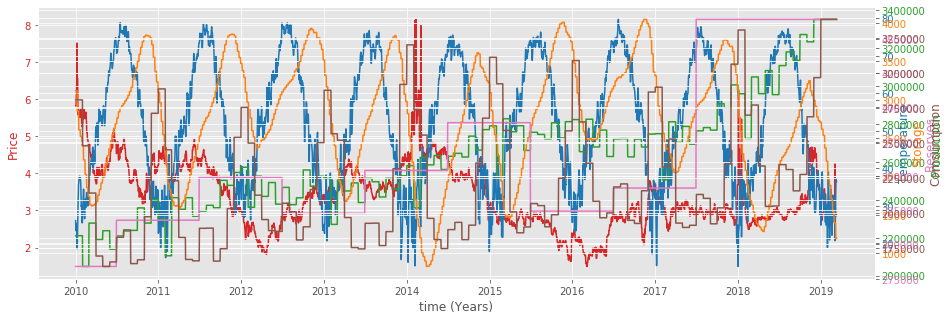

In [48]:
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_xlabel('time (Years)')
ax1.set_ylabel('Price', color=color)
ax1.plot(df_fine['DateTime'], df_fine['Henry Hub Price $/MMBtu'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(df_fine['DateTime'], df_fine['Temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()

color = 'tab:green'
ax3.set_ylabel('Production', color=color)  # we already handled the x-label with ax1
ax3.plot(df_fine['DateTime'], df_fine['Production MMCF'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1.twinx()

color = 'tab:orange'
ax4.set_ylabel('Storage', color=color)  # we already handled the x-label with ax1
ax4.plot(df_fine['DateTime'], df_fine['Storage BCFE'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax5 = ax1.twinx()

color = 'tab:pink'
ax5.set_ylabel('Reserves', color=color)  # we already handled the x-label with ax1
ax5.plot(df_fine['DateTime'], df_fine['Reserves BCFE'], color=color)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax1.twinx()

color = 'tab:brown'
ax6.set_ylabel('Comsumption', color=color)  # we already handled the x-label with ax1
ax6.plot(df_fine['DateTime'], df_fine['Consumption MMCF'], color=color)
ax6.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


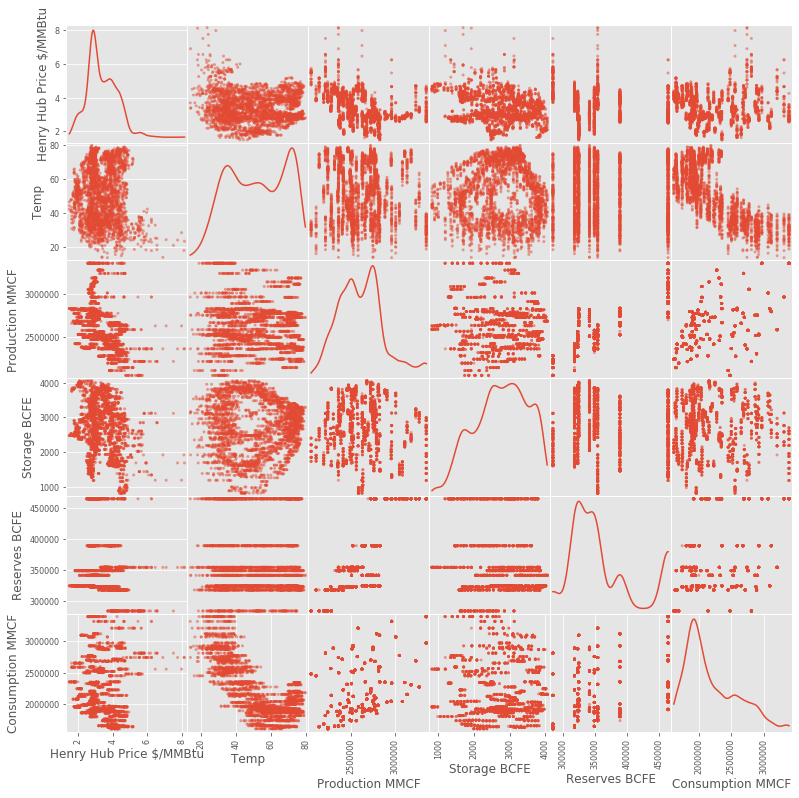

In [49]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
ax = scatter_matrix(df_fine, ax=ax, diagonal='kde')

# we are going to test moving the data to release day to the public to see if there is an effect on the correlation.

In [50]:
df_all_test_shift = df_all_test

In [51]:
df_all_test_shift['Storage BCFE']=df_all_test_shift['Storage BCFE'].shift(periods=6)
df_all_test_shift['Production MMCF'] = df_all_test_shift['Production MMCF'].shift(periods=90)
df_all_test_shift['Consumption MMCF'] = df_all_test_shift['Consumption MMCF'].shift(periods=90)
df_all_test_shift['Reserves BCFE'] = df_all_test_shift['Reserves BCFE'].shift(periods=547)

In [52]:
df_shift_almost = df_all_test_shift.fillna(method='ffill')

In [53]:
df_shift = df_shift_almost[(df_shift_almost.DateTime > '2009-12-31')& (df_shift_almost.DateTime < '2019-03-12')]
df_shift.head(3)

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
731,2010-01-01,5.82,26.0317,2197157.0,NaN,255035.0,1666520.0
731,2010-01-01,5.82,26.0317,2197157.0,NaN,255035.0,1666520.0
732,2010-01-02,5.82,24.2249,2197157.0,NaN,255035.0,1666520.0


In [54]:
df_shift['Storage BCFE'] = df_shift['Storage BCFE'].fillna(method = 'bfill')
df_shift.iloc[1]

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DateTime                   2010-01-01 00:00:00
Henry Hub Price $/MMBtu                   5.82
Temp                                   26.0317
Production MMCF                    2.19716e+06
Storage BCFE                              3117
Reserves BCFE                           255035
Consumption MMCF                   1.66652e+06
Name: 731, dtype: object

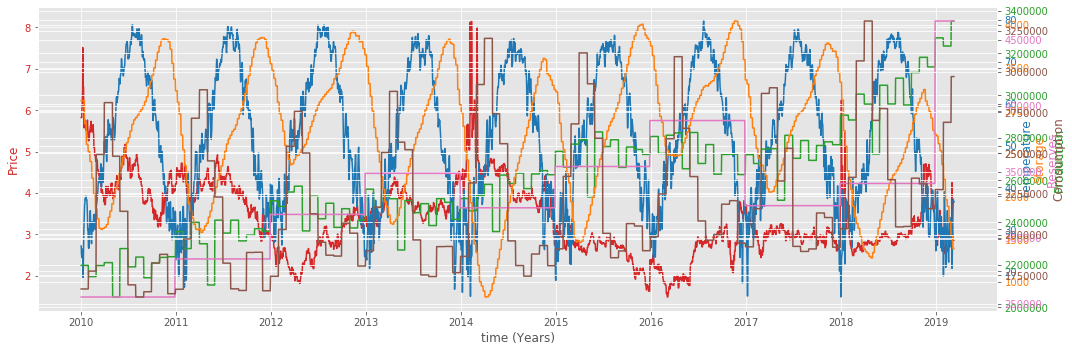

In [55]:
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_xlabel('time (Years)')
ax1.set_ylabel('Price', color=color)
ax1.plot(df_shift['DateTime'], df_shift['Henry Hub Price $/MMBtu'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(df_shift['DateTime'], df_shift['Temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()

color = 'tab:green'
ax3.set_ylabel('Production', color=color)  # we already handled the x-label with ax1
ax3.plot(df_shift['DateTime'], df_shift['Production MMCF'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1.twinx()

color = 'tab:orange'
ax4.set_ylabel('Storage', color=color)  # we already handled the x-label with ax1
ax4.plot(df_shift['DateTime'], df_shift['Storage BCFE'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax5 = ax1.twinx()

color = 'tab:pink'
ax5.set_ylabel('Reserves', color=color)  # we already handled the x-label with ax1
ax5.plot(df_shift['DateTime'], df_shift['Reserves BCFE'], color=color)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax1.twinx()

color = 'tab:brown'
ax6.set_ylabel('Comsumption', color=color)  # we already handled the x-label with ax1
ax6.plot(df_shift['DateTime'], df_shift['Consumption MMCF'], color=color)
ax6.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.tight_layout()

In [56]:
def plot_trend_data(ax, column_name, df):
    ax.plot(df['DateTime'], df[column_name])
    ax.set_title("Ten years trend of {}".format(column_name))

In [57]:
data_columns = ['Henry Hub Price $/MMBtu', 'Temp', 'Production MMCF',
       'Storage BCFE', 'Reserves BCFE', 'Consumption MMCF']

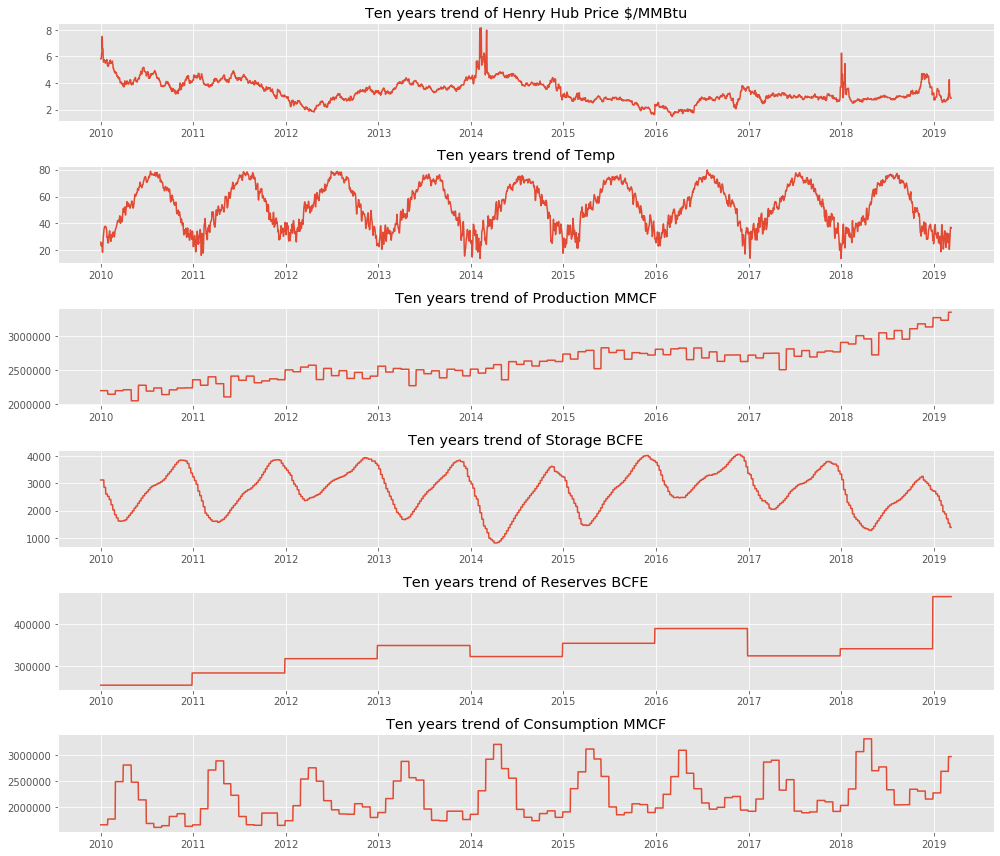

In [58]:
fig, axs = plt.subplots(len(data_columns), figsize=(14, 12))

for ax, column_name in zip(axs, data_columns):
    plot_trend_data(ax, column_name, df_shift)
    
plt.tight_layout()

#### Some observations:

- the `price` plot shows a more random pattern than the others. it has a non-linear trend over time.
- The `temperature` plot shows very strong oscillations aligned with seasonality in the northern hemisphere. 
- The `production` plot shows a general increase over time, probably influenced by the increase in shale plays production efficiencies.
- The `storage` plot shows very strong oscillations aligned with seasonality in the northern hemisphere. In general, storage levels decrease during the winter and increase during the summer.
- The `reserves` plot shows a general increase over time, probably influenced by the increase in shale plays discoveries in the last few years.
- The `consumption` plot shows very strong oscillations aligned with seasonality in the northern hemisphere. In general, natural gas consumption levels increase during the winter and decrease during the summer.

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


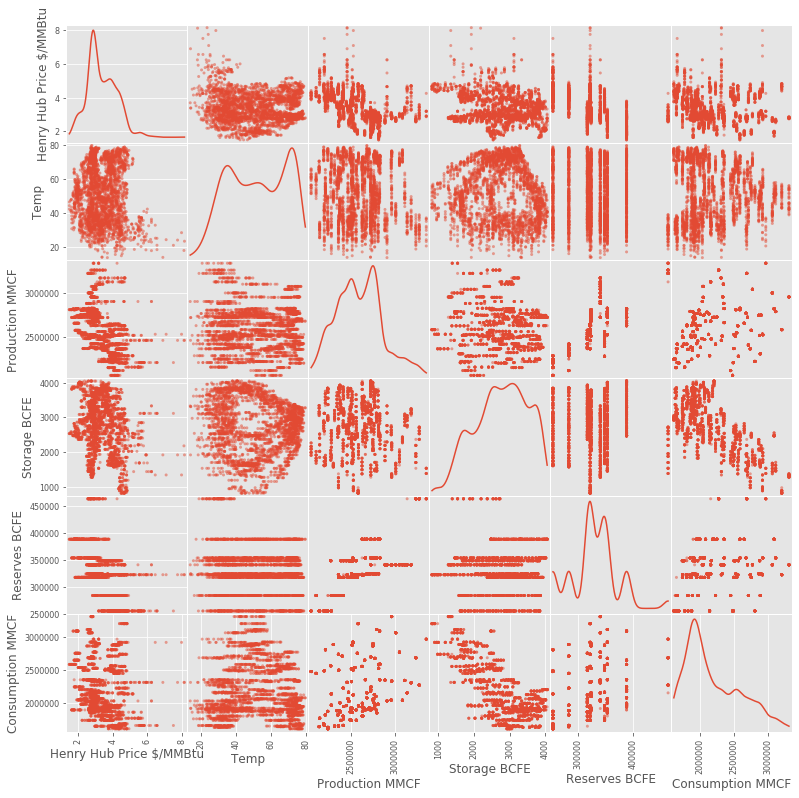

In [59]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
ax = scatter_matrix(df_shift, ax=ax, diagonal='kde')

In [60]:
import datetime

date = datetime.datetime.strptime("2015-06-01 00:00:00",
                                  "%Y-%m-%d %H:%M:%S")
#print date.timetuple().tm_yday

In [61]:
def doy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return date.timetuple().tm_yday

In [62]:
df_shift_final =df_shift.drop_duplicates(keep='first')

In [63]:
df_shift_final['DOY'] =df_shift_final['DateTime']

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_shift_final['DOY'] = df_shift_final['DOY'].apply(lambda x : doy(x))

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_shift_final.tail()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY
4083,2019-03-07,2.90,31.3371,3351564.0,1390.0,464292.0,2969569.0,66
4084,2019-03-08,2.90,35.1228,3351564.0,1390.0,464292.0,2969569.0,67
4085,2019-03-09,2.90,37.1899,3351564.0,1390.0,464292.0,2969569.0,68
4086,2019-03-10,2.90,36.4206,3351564.0,1390.0,464292.0,2969569.0,69
4087,2019-03-11,2.86,36.5454,3351564.0,1390.0,464292.0,2969569.0,70


In [66]:
df_group = df_shift_final.groupby(by= 'DOY').median()

In [67]:
df_group.head(2)

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
DOY,,,,,,
1,3.560,25.22460,2638663.5,3282.0,332718.0,1906947.0
2,3.505,25.86265,2638663.5,3282.0,332718.0,1906947.0


In [68]:
df_group.describe()

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
count,366.000000,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02
mean,3.155861,52.575521,2.587807e+06,2740.758197,326083.855191,2.196400e+06
std,0.215055,15.935294,7.325841e+04,737.391928,3624.872038,3.597683e+05
min,2.750000,25.224600,2.360061e+06,1614.000000,324303.000000,1.809291e+06
25%,2.985000,36.159150,2.568932e+06,2062.000000,324303.000000,1.906947e+06
50%,3.100000,52.894750,2.623914e+06,2804.000000,324303.000000,2.008815e+06
75%,3.307500,68.261700,2.633253e+06,3385.000000,324303.000000,2.521108e+06
max,3.770000,76.558100,2.720187e+06,3840.000000,341133.000000,2.900856e+06


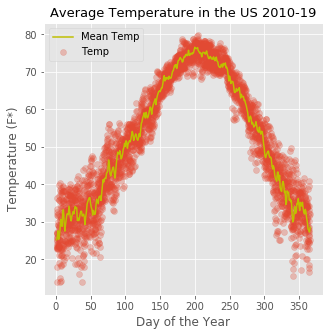

In [69]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Temperature (F*)')
ax.set_title("Average Temperature in the US 2010-19", fontsize = 13)
ax.scatter(df_shift_final['DOY'], df_shift_final['Temp'], label = 'Temp', alpha =.3)
ax.plot(df_group.index.values, df_group['Temp'] , label = 'Mean Temp', color = 'y')
ax.legend()

In [70]:
df_group[df_group['Temp'] == df_group['Temp'].max()]

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
DOY,,,,,,
200,3.11,76.5581,2583873.0,2764.0,324303.0,1961678.0


### The average hottest day for the period of 2010-19 is somewhere around the middle of July.

In [71]:
df_group[df_group['Temp'] == df_group['Temp'].min()]

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
DOY,,,,,,
1,3.56,25.2246,2638663.5,3282.0,332718.0,1906947.0


### The average coldest day for the period of 2010-19 is somewhere around early January.

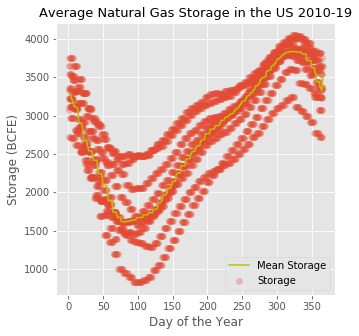

In [72]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Storage (BCFE)')
ax.set_title("Average Natural Gas Storage in the US 2010-19", fontsize = 13)
ax.scatter(df_shift_final['DOY'], df_shift_final['Storage BCFE'], label = 'Storage', alpha =.3)
ax.plot(df_group.index.values, df_group['Storage BCFE'] , label = 'Mean Storage', color = 'y')
ax.legend()

In [73]:
df_group[df_group['Storage BCFE'] == df_group['Storage BCFE'].max()]

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
DOY,,,,,,
321,3.46,41.1111,2644937.0,3840.0,324303.0,2008815.0


### The avg. highest levels of Natural Gas storage in the last 10 years happened in the Middle of November 

In [74]:
df_group[df_group['Storage BCFE'] == df_group['Storage BCFE'].min()]

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF
DOY,,,,,,
83,2.97,44.6146,2543747.0,1614.0,324303.0,2679165.0


### The avg. lowest levels of Natural Gas storage in the last 10 years happened in the end of March

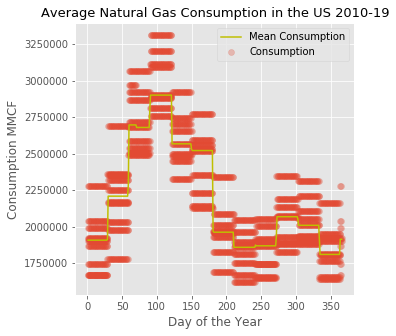

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Consumption MMCF')
ax.set_title("Average Natural Gas Consumption in the US 2010-19", fontsize = 13)
ax.scatter(df_shift_final['DOY'], df_shift_final['Consumption MMCF'], label = 'Consumption', alpha =.3)
ax.plot(df_group.index.values, df_group['Consumption MMCF'] , label = 'Mean Consumption', color = 'y')
ax.legend()

In [ ]:
#df_shift_final.to_csv('data/cleaned_data_together.csv', index=False)